# How to load KBonus-BKG light curves

The light curves released in Martinez-Palomera et al. 2023 follow MAST standards and a similar structure as Kepler Light Curve Files (LCFs).
Therefore, these can be loaded using the [LightKurve](https://github.com/lightkurve/lightkurve) package. 

In this notebook we will show how to open the FITS files and what to expect in them.

We will use one known eclipsing binariy (EB) as example.

In [65]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.io import fits
from lightkurve.io.generic import read_generic_lightcurve

from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fd0c1560d30>

## 1. The FITS file

First let's explore the FITS file and its extensions

In [39]:
# download FITS file from MAST with lightkurve

# KIC 5300878 appears to be an eclipsing binary (https://iopscience.iop.org/article/10.3847/1538-4365/ac770f), 
# so maybe the large excursions in red_chi2 reflect blending?
# fname = lk.search_lightcurve("KIC 5300878", cadence="long", mission="Kepler", author="KBONUS-BKG").download().filename

# 2024 Feb 19 -- Kepler-78
fname = lk.search_lightcurve("KIC 8435766", cadence="long", mission="Kepler", author="KBONUS-BKG").download().filename

hdul = fits.open(fname)
hdul.info()

/Users/brian/opt/anaconda3/envs/Experiments_with_KBONUS/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Filename: /Users/brian/.lightkurve/cache/mastDownload/HLSP/hlsp_kbonus-bkg_kepler_kepler_gaia-dr3-2078373642776671232_kepler_v1.0/hlsp_kbonus-bkg_kepler_kepler_gaia-dr3-2078373642776671232_kepler_v1.0_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      48   ()      
  1  LIGHTCURVE_STITCHED    1 BinTableHDU     40   65275R x 11C   [D, J, K, D, D, D, D, D, D, J, J]   
  2  LIGHTCURVE_Q0    1 BinTableHDU     63   469R x 13C   [J, D, D, D, D, D, D, D, J, D, D, D, D]   
  3  APERTURE_Q0    1 ImageHDU        10   (12, 10)   uint8   
  4  LIGHTCURVE_Q1    1 BinTableHDU     63   1624R x 13C   [J, D, D, D, D, D, D, D, J, D, D, D, D]   
  5  APERTURE_Q1    1 ImageHDU        10   (8, 7)   uint8   
  6  LIGHTCURVE_Q2    1 BinTableHDU     63   4081R x 13C   [J, D, D, D, D, D, D, D, J, D, D, D, D]   
  7  APERTURE_Q2    1 ImageHDU        10   (8, 6)   uint8   
  8  LIGHTCURVE_Q3    1 BinTableHDU     63   4135R x 13C   [J, D, D, D, D, D, D, D, J

The FITS contains 36 extensions:

0. **PRIMARY** has the standard header information such as creator, target details, version, and others
1. **LIGHTCURVE_STITCHED** has stitched light curve.
2. **LIGHTCURVE_Q1** has the light curve and metrics from quarter 1
3. **APERTURE_Q1** has the aperture mask used for photometry during quarter 1.

In [44]:
# primary header
hdul["PRIMARY"].header
# hdul["PRIMARY"].header["KEPMAG"]
# hdul["PRIMARY"].header["KEPMAG"]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
DOI     = '10.17909/7jbr-w430' / Digital Object Identifier for the HLSP data col
HLSPID  = 'KBONUS-BKG'                                                          
HLSPLEAD= 'Jorge martinez-Palomera'                                             
HLSPVER = 'V1.0    '                                                            
LICENSE = 'CC BY 4.0'                                                           
LICENURL= 'https://creativec

The Primary header has important information such as:
* Software and versioning 
* Telescope and filters
* Target identifiers from the Kepler and Gaia catalogs
* Object coordinates and basic Gaia photometry and astrometry. 
* Detection flag **QDETECT** from our pipeline codified as a 18-long string with no detection (0), detection (1), partial detection (2)

In [41]:
# the light curve data
hdul["LIGHTCURVE_STITCHED"].data

FITS_rec([( 120.53887241,   568,  0, 13895.00025115, 9.30524573, 82177.05279729,  8.73351901, 13901.67451339, 9.510777  ,   0, 0),
          ( 120.55930686,   569,  0, 13874.03759295, 9.29952927, 82217.85038405,  8.73188453, 13880.17378406, 9.48434086,   0, 0),
          ( 120.57974121,   570,  0, 13864.76139392, 9.29526586, 82296.0337585 ,  8.73148562, 13870.37049605, 9.4583061 ,   0, 0),
          ...,
          (1590.96037035, 72529, 17, 14140.0034982 , 8.30503381, 82572.33221176, 14.0830052 , 13977.58099364, 8.71295508,   0, 0),
          (1590.98080466, 72530, 17, 13875.72719958, 8.30279281, 82534.26188046, 14.0782855 , 13710.2186734 , 8.76148838, 128, 0),
          (1591.00123918, 72531, 17, 14092.31774574, 8.29940146, 82558.52615129, 14.08089414, 13923.16304107, 8.80506318,   0, 0)],
         dtype=(numpy.record, [('TIME', '>f8'), ('CADENCENO', '>i4'), ('QUARTER', '>i8'), ('FLUX', '>f8'), ('FLUX_ERR', '>f8'), ('SAP_FLUX', '>f8'), ('SAP_FLUX_ERR', '>f8'), ('PSF_FLAT_FLUX', '>f8')

In [42]:
# quarter light curve header
hdul["LIGHTCURVE_Q0"].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   96 / length of dimension 1                          
NAXIS2  =                  469 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   13 / number of table fields                         
TTYPE1  = 'CADENCENO'                                                           
TFORM1  = 'J       '                                                            
TTYPE2  = 'TIME    '                                                            
TFORM2  = 'D       '                                                            
TUNIT2  = 'BJD - 2454833'   

Extraction flags per quarter are in the "LIGHTCURVE_Q" extension:
* Pixel location of the source
* **FLFRCSAP**, **CROWDSAP**, and **NPIXSAP** are completeness, crowding and number of pixels in the aperture photometry. 
* **PSFFRAC**, **PERTRATI**, and **PERTSTD** are PSF fraction on the TPF, ratio between the mean-psf and perturbed-PSF models, and variance of the perturbed model. These metrics are useful to check the quality of the PSF extraction. 
* **ITERNEG** indicates if a sources was iterated with narrow prior during PSF fitting step in order to rescue predicted negative fluxes.

In [45]:
# aperture mask data
hdul["APERTURE_Q0"].data

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

## 2. Load files with `lightkurve`

### 2.1 Read the primary header

We can read the file with the `.read()` from the lightkurve package. 
This will read from the primary header, then the fully stitched light curve will be loaded. 

In [46]:
lc = lk.read(fname)
lc

time,flux,flux_err,cadenceno,quarter,quality,sap_flux,sap_flux_err,psf_flat_flux,psf_flat_flux_err,sap_quality,flatten_mask
,electron / s,electron / s,,,,electron / s,electron / s,electron / s,electron / s,,
Time,float64,float64,int32,int64,int32,float64,float64,float64,float64,int32,int32
120.53887240588665,13895.00025114519,9.30524573044237,568,0,0,82177.05279728545,8.733519008701698,13901.674513386446,9.510776998780447,0,0
120.55930685903877,13874.037592950785,9.299529271592357,569,0,0,82217.85038404996,8.731884525200847,13880.173784059592,9.484340856591388,0,0
120.57974121300504,13864.76139392123,9.29526585595579,570,0,0,82296.03375850178,8.731485624439468,13870.370496049094,9.458306100857937,0,0
120.60017576627433,13914.456555944398,9.293845214717978,571,0,0,82411.60318724703,8.733344360140185,13919.546415804723,9.436754838900127,0,0
120.62061021989211,13917.372304892058,9.289128563030356,572,0,0,82495.50715811015,8.733853206695958,13921.95743795696,9.411795545114945,0,0
120.64104457339272,13936.52147697202,9.286147953054014,573,0,0,82569.73790076791,8.733969358920488,13940.612264702468,9.392345982746246,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1590.8990670982748,14108.736479886147,8.301700443192482,72526,17,0,82560.43214210527,14.079036669673677,13956.108732259087,8.559427454629322,0,0


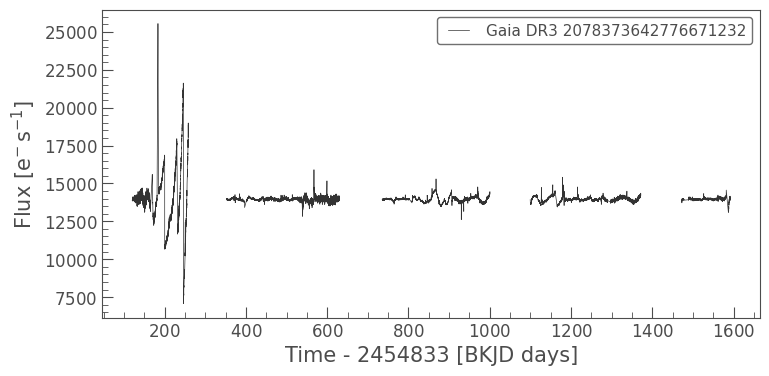

In [47]:
# this will plot the PSF photometry

lc.plot()
plt.show()

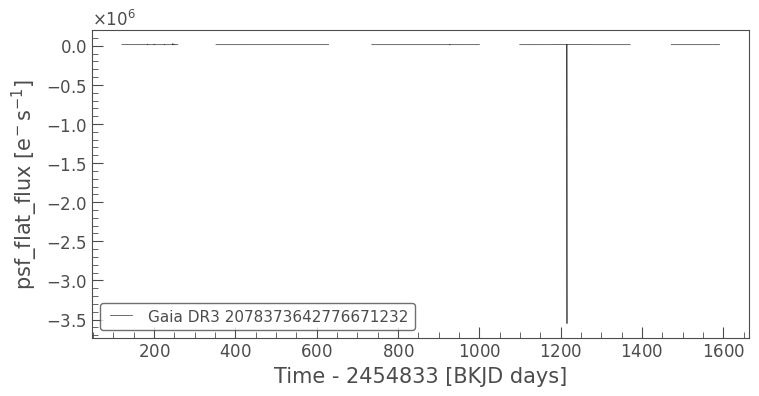

In [48]:
# this will plot the flatten version

lc.plot(column="psf_flat_flux")
plt.show()

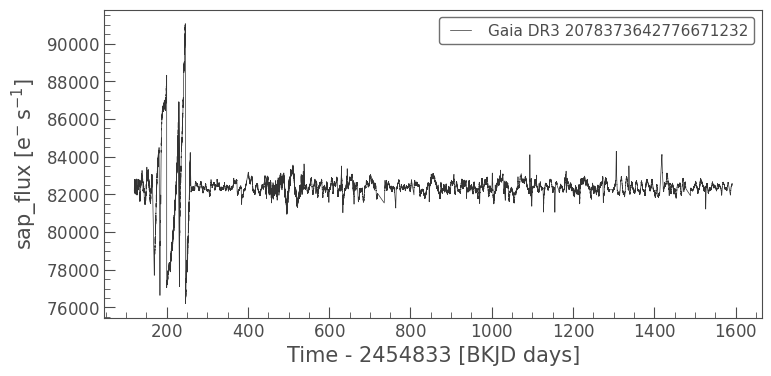

In [49]:
# this will plot the faperture photometry

lc.plot(column="sap_flux")
plt.show()

### 2.2 Read the multi-extensions as LightCurve objects

We can load the per-quarter light curves that are stored in the other extensions using the `read_generic_lightcurve()` method.
This is useful in case a specific quarter light curve gets rejected from the stitched version.
The later happens for sources with a PSF fraction lower than 50%. 
Also, centroid information and background light curves are stored in this extension. 

In [50]:
hdul = fits.open(fname)
    
aux = []
for k in range(len(hdul)):
    if "LIGHTCURVE_Q" in hdul[k].name:
        aux.append(read_generic_lightcurve(fname, ext=k, time_format = "bkjd"))
lcq = lk.LightCurveCollection(aux)

In [51]:
lcq[0]

time,flux,flux_err,cadenceno,sap_flux,sap_flux_err,centroid_column,centroid_row,sap_quality,sap_bkg,red_chi2,psf_flux_nova,psf_flux_err_nova
,electron / s,electron / s,,electron / s,electron / s,pix,pix,,,,electron / s,electron / s
Time,float64,float64,int32,float64,float64,float64,float64,int32,float64,float64,float64,float64
120.53887240588665,33879.42793238524,9.15024584842697,568,110881.03125,8.635319709777832,18.809866723393796,152.5027152071378,0,791.5487060546875,3276809.1114139133,34036.3157553572,9.119565399342731
120.55930685903877,33828.759545285815,9.1477725696947,569,110936.0625,8.637313842773438,18.809199615344042,152.50225274319502,0,791.627685546875,3280082.064848424,34108.70922434241,9.120753484157445
120.57974121300504,33806.623278146144,9.1467218457063,570,111041.859375,8.64099407196045,18.809430574589484,152.501930589829,0,791.1395263671875,3270947.286739843,34181.061820021765,9.12265757920121
120.60017576627433,33928.47545043745,9.148504738999582,571,111198.421875,8.646469116210938,18.80876611484365,152.5013982159359,0,791.5186767578125,3275192.591094033,34371.5079478389,9.126788396765033
120.62061021989211,33936.10269571349,9.146955950202626,572,111312.09375,8.650474548339844,18.810186199528033,152.50149901987922,0,792.1094970703125,3268654.0296853576,34426.26873504737,9.127057049380683
120.64104457339272,33983.36447612975,9.14750964285964,573,111412.703125,8.653980255126953,18.80988283630535,152.5006810908411,0,792.3893432617188,3268218.7553771017,34501.02758686347,9.128910894357354
...,...,...,...,...,...,...,...,...,...,...,...,...
130.14306292077526,33873.87086361881,9.062413318982024,1038,111182.625,8.644497871398926,18.80972458764097,152.5037376086331,0,768.5969848632812,3253575.853931061,32993.077623933554,9.067788807588888


887405.9635940609 912323.4970255909 929768.4262105619


<Figure size 1000x1000 with 0 Axes>

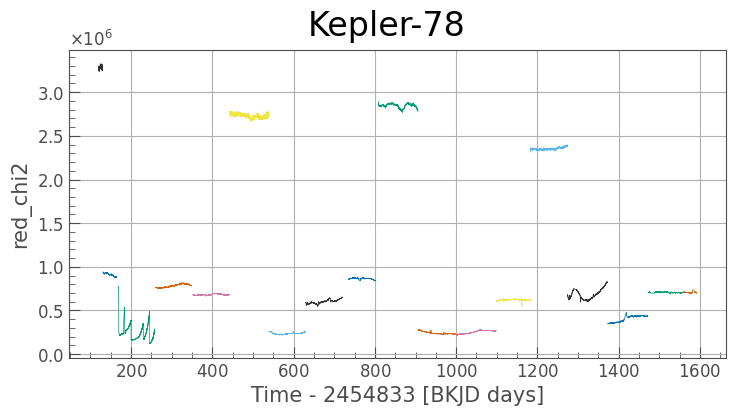

In [75]:
# 3285369.150299964 3258190.019836231 3301259.950261203
print(np.quantile(lcq[1]['red_chi2'], 0.15), np.median(lcq[1]['red_chi2']), np.quantile(lcq[1]['red_chi2'], 0.85))

fig = plt.figure(figsize=(10, 10))

ax = lcq[0].plot(column="red_chi2")
for i in range(1, len(lcq[:])):
    lcq[i].plot(column="red_chi2", ax=ax)

ax.grid(True)
ax.get_legend().remove()

ax.figure.suptitle("Kepler-78", fontsize=24)
ax.figure.savefig("../figures/red_chi2_Kepler-78.png", dpi=300, bbox_inches="tight")

The quarter light curve has multiple columns:

* **time** the time in BKJD
* **cadenceno** the cadence number 
* **flux** and **flux_err** the corrected PSF flux and its error
* **psf_flux_nova** and **psf_flux_err_nova** the mean PSF (no velocity aberration) flux and its error
* **sap_flux** and **sap_flux_err** the aperture flux and its error
* **centroid_column** and **centroid_row** the row and column centroid vectors
* **sap_quality** has the quality flag inherited from the TPF 
* **sap_bkg** the background flux in the aperture
* **red_chi2** the time series of the model chi square

In [15]:
lcq[5]

time,flux,flux_err,cadenceno,sap_flux,sap_flux_err,centroid_column,centroid_row,sap_quality,sap_bkg,red_chi2,psf_flux_nova,psf_flux_err_nova
,electron / s,electron / s,,electron / s,electron / s,pix,pix,,,,electron / s,electron / s
Time,float64,float64,int32,float64,float64,float64,float64,int32,float64,float64,float64,float64
539.470476440154,15069.277081414979,4.017635497533264,21070,13676.833984375,4.908571720123291,956.0814254345057,609.6471895095592,0,2453.8193359375,49476.07483860048,15290.918230052554,4.115843706683914
539.4909107964486,15049.249747192369,4.01621296690137,21071,13652.9423828125,4.906852722167969,956.0819775621209,609.6486412425915,0,2451.240478515625,49173.75713213466,15265.099602009072,4.113989111372828
539.5113452528603,15023.337973996766,4.014705121944509,21072,13637.626953125,4.9063568115234375,956.0817357105383,609.64688224709,0,2457.02880859375,49035.96364783202,15243.87531776962,4.112841864406722
539.5317795085721,14977.422683845452,4.010431310275355,21073,13582.947265625,4.900932312011719,956.081676232976,609.6482295703909,0,2457.55224609375,49087.3151591575,15192.89088330372,4.10708257677007
539.552213864401,14941.65704027633,4.008278602935241,21074,13550.736328125,4.899023532867432,956.0814958043552,609.648797368978,0,2455.484619140625,49040.88675421541,15155.184797305103,4.104844484842114
539.5726483198814,14892.121230662902,4.004756737998333,21075,13505.9384765625,4.895880222320557,956.0812307520223,609.6496276321508,0,2453.079345703125,48746.032993524714,15108.603213977929,4.10153438083243
539.5930825751275,14863.954062755483,4.00257658441247,21076,13479.052734375,4.893883228302002,956.08198403091,609.6490437073861,0,2450.901611328125,48315.99007730484,15074.465542328613,4.098936931255801
539.6135169300251,14799.195319639217,3.99673547675093,21077,13424.607421875,4.889273643493652,956.0817455084912,609.6476194623291,0,2449.094482421875,48417.73437541884,15020.742608791292,4.094927572232614


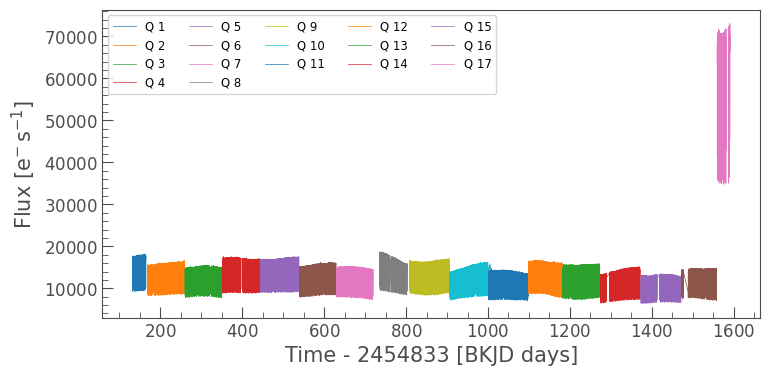

In [16]:
ax = lcq.plot()
ax.legend([f"Q {x}" for x in lcq.quarter], ncols=5, fontsize="small")
plt.show()

The photometry level in the last quarter (Q17) does not align with the others because the fraction of pixels in the PSF used in the quarter is less. 
We can see this by plotting the PSF fraction per quarter as follows

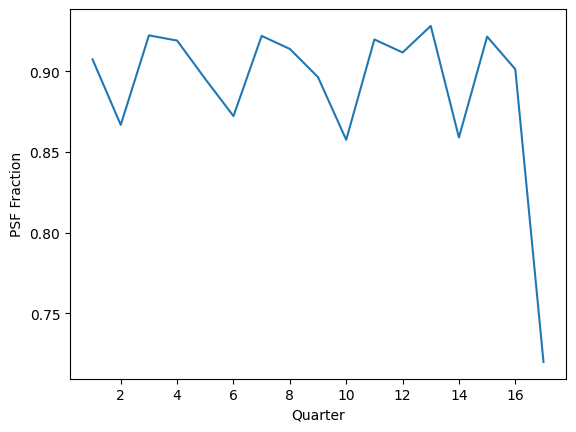

In [17]:
psf_frac = np.array([x.PSFFRAC for x in lcq])
quarters = np.array([x.quarter for x in lcq])

plt.plot(quarters, psf_frac)
plt.xlabel("Quarter")
plt.ylabel("PSF Fraction")
plt.show()

## 3. Fold periodic light curves

In [18]:
P = 1.279443

lc.plot()
# plt.show()

per = lc.to_periodogram(method="bls", frequency_factor=100, minimum_period=P*.9, maximum_period=P*1.1)

lc.fold(period=per.period_at_max_power, epoch_phase=per.transit_time_at_max_power.value).plot()

plt.show()
print("#####"*20)

TypeError: cannot write to unmasked output